# Trabajo final Grupo 8 (A)

        - Joel Andrés Lerma Pazos
        - Emmanuel de Jesús Muñoz Tapia
        - Carlos Valladares Morales

In [ ]:
# Importamos librerías

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import numpy as np

In [ ]:
# Leemos el archivo

venta = pd.read_excel('Base_proyecto.xlsx')
venta.head()

,Periodo,Dia,EquipoSim,Tipo,Subtipo,Marca,Gama,Precio,Ingreso,Costo,Margen,Rentabilidad,Tipo Venta,CanalVenta,CadenaDealer,Departamento,Canal,SubCanal,Cluster
0,202110,13,Equipo,Celular,Smartphone,ZTE,1. Low,NaN,173.03390,192.39,NaN,NaN,Porta,GRANDES TIENDAS,TOTTUS,LIMA,Retail,GRANDES TIENDAS,Cluster A
1,202110,27,Equipo,Celular,Smartphone,Samsung,2. Entry Smart,NaN,355.22030,338.88,NaN,NaN,VR,GRANDES TIENDAS,PLAZAVEA,JUNIN,Retail,GRANDES TIENDAS,Cluster B
2,202110,21,Equipo,Celular,Smartphone,Xiaomi,3. Mid,NaN,725.38980,769.94,NaN,NaN,Porta,GRANDES TIENDAS,OECHSLE,LAMBAYEQUE,Retail,GRANDES TIENDAS,Cluster B
3,202110,17,Equipo,Celular,Smartphone,Bmobile,1. Low,NaN,56.23729,35.41,NaN,NaN,VR,GRANDES TIENDAS,PLAZAVEA,ICA,Retail,GRANDES TIENDAS,Cluster A
4,202110,26,Equipo,Celular,Smartphone,Bmobile,1. Low,NaN,49.70339,34.85,NaN,NaN,Porta,GRANDES TIENDAS,METRO,LIMA,Retail,GRANDES TIENDAS,Cluster A


In [ ]:
venta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19552 entries, 0 to 19551
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Periodo       19552 non-null  int64  
 1   Dia           19552 non-null  int64  
 2   EquipoSim     19552 non-null  object 
 3   Tipo          19552 non-null  object 
 4   Subtipo       19552 non-null  object 
 5   Marca         19552 non-null  object 
 6   Gama          19552 non-null  object 
 7   Precio        0 non-null      float64
 8   Ingreso       19552 non-null  float64
 9   Costo         19552 non-null  float64
 10  Margen        1 non-null      object 
 11  Rentabilidad  0 non-null      float64
 12  Tipo Venta    19552 non-null  object 
 13  CanalVenta    19551 non-null  object 
 14  CadenaDealer  16243 non-null  object 
 15  Departamento  19404 non-null  object 
 16  Canal         19552 non-null  object 
 17  SubCanal      19552 non-null  object 
 18  Cluster       19404 non-nu

In [ ]:
# Cálculo del margen y la rentabilidad

venta['Margen'] = venta['Ingreso'] - venta['Costo']
venta['Rentabilidad'] = ((venta['Margen']/venta['Ingreso'])*100).round(2)

In [ ]:
# Eliminación de la columna precio que tiene todos los valores nulos
# Eliminación de la columna CanalVenta, dado que tiene valores repetidos con la columna SubCanal

venta.drop(columns=['Precio', 'CanalVenta'], inplace=True)

In [ ]:
# Reemplazo de valores digitados

venta.Tipo.replace({'Celular':'celular'}, inplace=True)
venta.Subtipo.replace(['Smartphone', 'Feature'], 'smartphone', inplace=True)

## Nivel Básico

### 1. Haga una descripción general de los datos

#### 1.1 Estuctura de los datos

In [ ]:
# Utilizamos el atributo shape para obtener la cantidad de variables y de registros del DataFrame

print(f'Hay {venta.shape[0]} registros en la tabla de venta de equipos móviles.')
print(f'Hay {venta.shape[1]} variables en la tabla de venta de equipos móviles.')

Hay 19552 registros en la tabla de venta de equipos móviles.
Hay 17 variables en la tabla de venta de equipos móviles.


#### 1.2 Tipos de datos

In [ ]:
# Revisión de la cantidad de tipos de datos de las variables de la tabla

venta.dtypes.value_counts()

object     11
float64     4
int64       2
dtype: int64

#### 1.3 Datos duplicados

In [ ]:
# Cantidad de datos duplicados en el DataFrame

print(f' Hay {venta.duplicated().sum()} datos duplicados en el DataFrame')

 Hay 2409 datos duplicados en el DataFrame


### 2. Realice estadísticas descriptivas para las variables que usted crea conveniente

#### 2.1 Estadística descriptiva de las variables numéricas

In [ ]:
venta.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Periodo,19552.0,202110.000000,0.000000,202110.000000,202110.0000,202110.0000,202110.00000,202110.000
Dia,19552.0,15.902619,8.843870,1.000000,8.0000,16.0000,23.00000,31.000
Ingreso,19552.0,333.531571,243.325959,7.118644,141.6610,298.2712,471.84740,4177.932
Costo,19552.0,351.304694,252.156903,27.970000,157.0600,338.1200,540.40500,4271.580
Margen,19552.0,-17.773123,70.165282,-1379.876800,-50.9513,-13.3578,21.49729,1125.119
Rentabilidad,19552.0,-2.137231,96.044791,-5585.490000,-14.0300,-4.1900,17.32000,95.980


#### 2.2 Frecuencia para cada valor de las variables categóricas

In [ ]:
venta.describe(include='object')

,EquipoSim,Tipo,Subtipo,Marca,Gama,Tipo Venta,CadenaDealer,Departamento,Canal,SubCanal,Cluster
count,19552,19552,19552,19552,19552,19552,16243,19404,19552,19552,19404
unique,1,1,1,15,5,3,475,24,4,11,3
top,Equipo,celular,smartphone,Bmobile,1. Low,Reno,ISLA,LIMA,Retail,GRANDES TIENDAS,Cluster A
freq,19552,19552,19552,4566,6540,10342,1795,10335,13775,13449,11794


In [ ]:
venta['Marca'].value_counts()

Bmobile     4566
Motorola    4275
Samsung     3645
Xiaomi      3368
ZTE         2883
POCO         243
Alcatel      179
Vivo         121
Azumi         68
Nokia         58
Realme        55
EKS           50
Apple         32
LG             7
Huawei         2
Name: Marca, dtype: int64

In [ ]:
venta['Gama'].value_counts()

1. Low            6540
2. Entry Smart    6487
3. Mid            5937
4. High            565
5. Premium          23
Name: Gama, dtype: int64

In [ ]:
venta['Tipo Venta'].value_counts()

Reno     10342
Porta     6763
VR        2447
Name: Tipo Venta, dtype: int64

In [ ]:
venta['Departamento'].value_counts()

LIMA             10335
PIURA             1453
LA LIBERTAD       1253
LAMBAYEQUE        1199
ICA                971
AREQUIPA           784
UCAYALI            559
JUNIN              506
ANCASH             488
CAJAMARCA          367
HUANUCO            328
PUNO               303
CUSCO              211
SAN MARTIN         149
TACNA              144
TUMBES             123
MOQUEGUA            84
LORETO              45
AYACUCHO            20
AMAZONAS            18
HUANCAVELICA        18
PASCO               16
MADRE DE DIOS       15
APURIMAC            15
Name: Departamento, dtype: int64

In [ ]:
venta['Canal'].value_counts()

Retail     13775
ISLAS       2942
Tiendas     2503
Otros        332
Name: Canal, dtype: int64

In [ ]:
venta['SubCanal'].value_counts()

GRANDES TIENDAS                  13449
ISLAS                             2942
TIENDAS PROPIAS FRANQUICIADAS     2160
GRANDES TIENDAS ESPECIALISTAS      302
TIENDAS PROPIAS                    292
Otros                              195
Mayoristas                         132
Tiendas Propias                     51
RETAIL-REMOTO                       24
Conecta Plus                         4
S2S                                  1
Name: SubCanal, dtype: int64

## Nivel Intermedio

### 3. Haga análisis de los valores faltantes

In [ ]:
# Revisión de la cantidad de datos faltantes por variable

venta.isnull().sum()

Periodo            0
Dia                0
EquipoSim          0
Tipo               0
Subtipo            0
Marca              0
Gama               0
Ingreso            0
Costo              0
Margen             0
Rentabilidad       0
Tipo Venta         0
CadenaDealer    3309
Departamento     148
Canal              0
SubCanal           0
Cluster          148
dtype: int64

In [ ]:
venta[venta['Departamento'].isnull()].head(5)

,Periodo,Dia,EquipoSim,Tipo,Subtipo,Marca,Gama,Ingreso,Costo,Margen,Rentabilidad,Tipo Venta,CadenaDealer,Departamento,Canal,SubCanal,Cluster
614,202110,22,Equipo,celular,smartphone,Bmobile,1. Low,66.94915,33.57793,33.37122,49.85,Reno,NaN,NaN,Otros,Otros,NaN
691,202110,18,Equipo,celular,smartphone,Bmobile,1. Low,49.11864,35.32000,13.79864,28.09,Reno,NaN,NaN,Retail,RETAIL-REMOTO,NaN
755,202110,22,Equipo,celular,smartphone,Samsung,2. Entry Smart,319.62710,338.32000,-18.69290,-5.85,Reno,NaN,NaN,Otros,Otros,NaN
757,202110,4,Equipo,celular,smartphone,ZTE,1. Low,152.18640,155.46000,-3.27360,-2.15,Reno,NaN,NaN,Otros,Otros,NaN
758,202110,4,Equipo,celular,smartphone,ZTE,1. Low,152.18640,155.46000,-3.27360,-2.15,Reno,NaN,NaN,Otros,Otros,NaN


Los 148 registros que tienen un valor nulo en la columna 'Cluster', también tienen un valor nulo en las columnas 'Departamento' y 'CadenaDealer'. Por lo que una opción para no trabajar con valores faltantes podría ser eliminar estos registros. De esta manera solo quedaría con datos faltantes la columna 'CadenaDealer'. La otra opción sería etiquetar los datos faltantes con categorías como 'Otros' o 'Desconocido'.

### 4. Visualice los gráficos que sean necesarios (5 gráficos como máximo)

#### 4.1 Conteo de las diferentes marcas vendidas

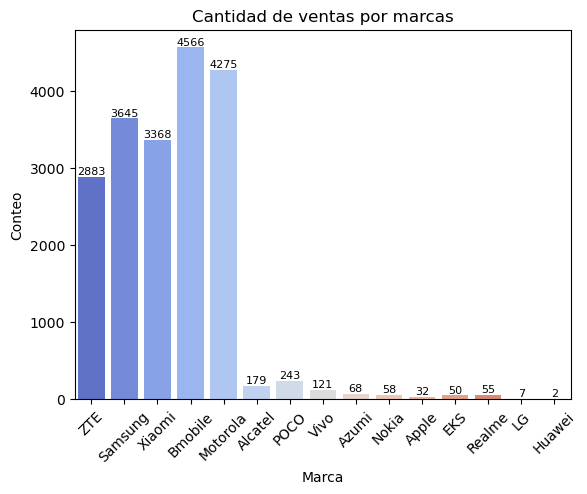

In [ ]:
# Frecuencia de las diferentes marcas
marca = venta['Marca'].value_counts()

# Gráfico countplot
sns.countplot(data=venta, x='Marca', hue='Marca', palette='coolwarm')
for i, txt in enumerate(marca):
  plt.text(marca.index[i],marca[i]+30,str(txt), ha='center', fontsize=8, color='black')
plt.xticks(rotation=45)
plt.ylabel('Conteo')
plt.title('Cantidad de ventas por marcas')
plt.show()

#### 4.2 Cantidad de ventas de móviles por departamento

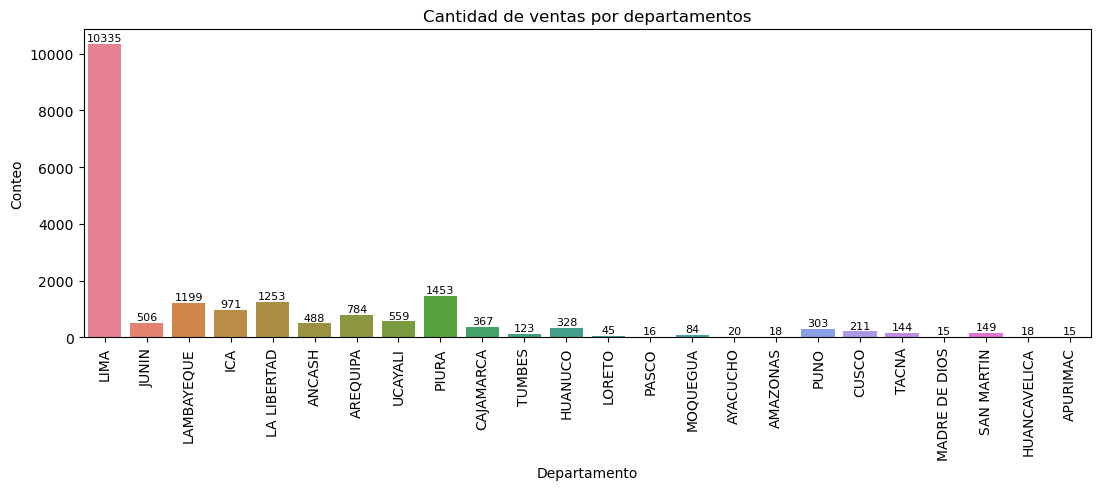

In [ ]:
# Cantidad de ventas por departamento
dpto = venta['Departamento'].value_counts()

# Gráfico countplot
plt.figure(figsize=(13, 4))
sns.countplot(data=venta, x='Departamento', hue='Departamento', legend=False)
for i, txt in enumerate(dpto):
  plt.text(dpto.index[i],dpto[i]+100,str(txt), ha='center', fontsize=8, color='black')
plt.xticks(rotation=90)
plt.ylabel('Conteo')
plt.title('Cantidad de ventas por departamentos')
plt.show()

#### 4.3 Cantidad de ventas según la gama del equipo móvil vendido

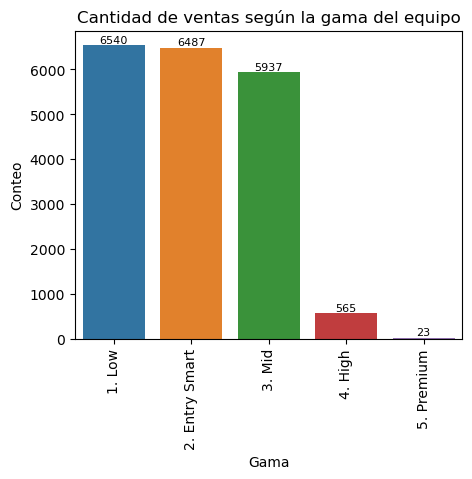

In [ ]:
# Cantidad de ventas por departamento
gama = venta['Gama'].value_counts()

# Gráfico countplot
plt.figure(figsize=(5, 4))
sns.countplot(data=venta, x='Gama', hue='Gama')
for i, txt in enumerate(gama):
  plt.text(gama.index[i],gama[i]+50,str(txt), ha='center', fontsize=8, color='black')
plt.xticks(rotation=90)
plt.ylabel('Conteo')
plt.title('Cantidad de ventas según la gama del equipo')
plt.show()

#### 4.4 Margen según la gama del equipo móvil vendido

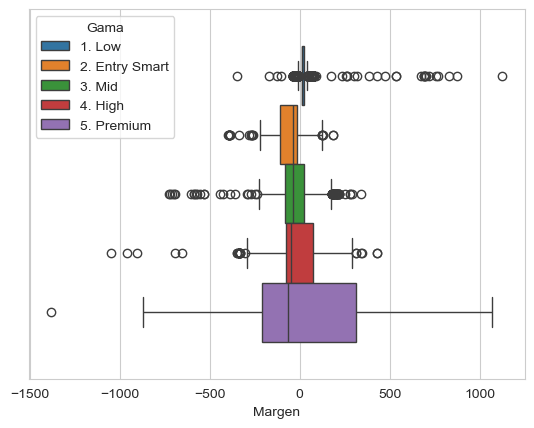

In [ ]:
sns.set_style('whitegrid')
sns.boxplot(data=venta, x='Margen', hue='Gama')
plt.show()

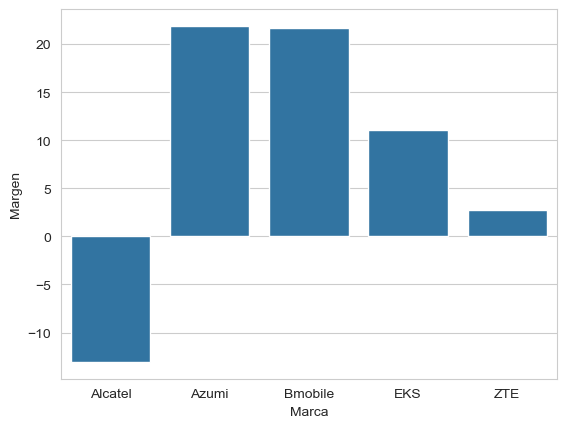

In [ ]:
venta_low = venta[venta['Gama'] == '1. Low']
venta_low.groupby('Marca').mean()
sns.barplot(data=venta_low.groupby('Marca').mean(), x='Marca', y='Margen')
plt.show()

#### 4.5 Margen según el Cluster

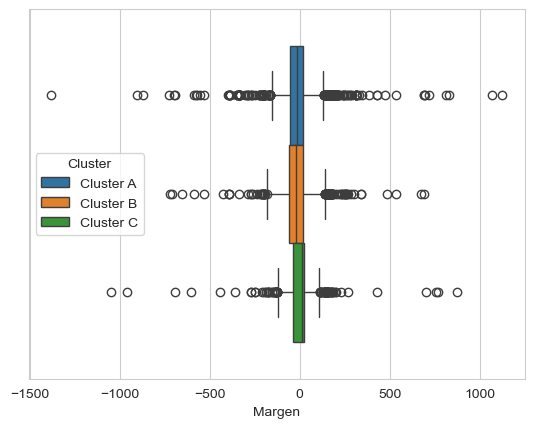

In [ ]:
sns.set_style('whitegrid')
sns.boxplot(data=venta, x='Margen', hue='Cluster')
plt.show()

### 5. Realice un heatmap con las variables que usted considere

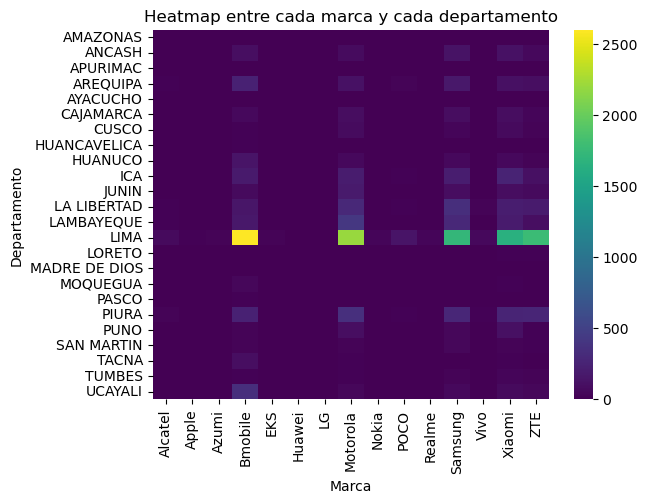

In [ ]:
marca_dpto = pd.crosstab(columns=venta['Marca'], index=venta['Departamento'])
sns.heatmap(marca_dpto, cmap='viridis')
plt.title('Heatmap entre cada marca y cada departamento')
plt.show()

## Nivel Data Analyst

### a. Cuál es la distribución de la marca de los equipos?

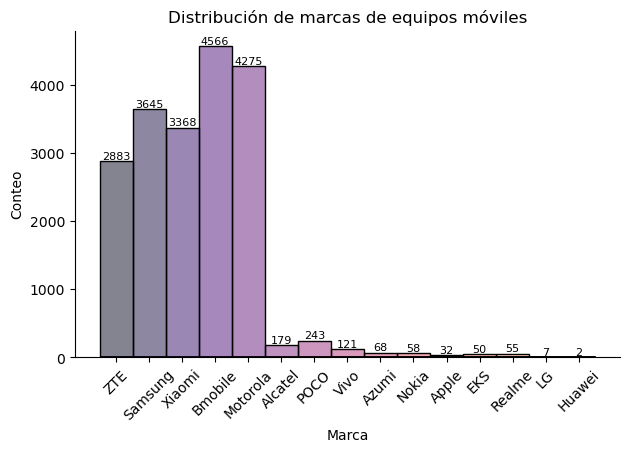

In [ ]:
# Frecuencia de las diferentes marcas
marca = venta['Marca'].value_counts()

# Gráfico countplot
sns.displot(data=venta, x='Marca', hue='Marca', palette='magma', legend=False, height=4, aspect=1.6)
for i, txt in enumerate(marca):
  plt.text(marca.index[i],marca[i]+30,str(txt), ha='center', fontsize=8, color='black')
plt.xticks(rotation=45)
plt.ylabel('Conteo')
plt.title('Distribución de marcas de equipos móviles')
plt.show()

Podemos observar como casi el 98% de las ventas de equipos móviles se concentra en los equipos de las marcas ZTE, Samsung, Xiaomi, Bmobile y Motorola. Bmobile y Motorola son las marcas que más ventas de equipos móviles tienen.

### b. Qué tipo de venta trae más ingreso, Porta o VR?

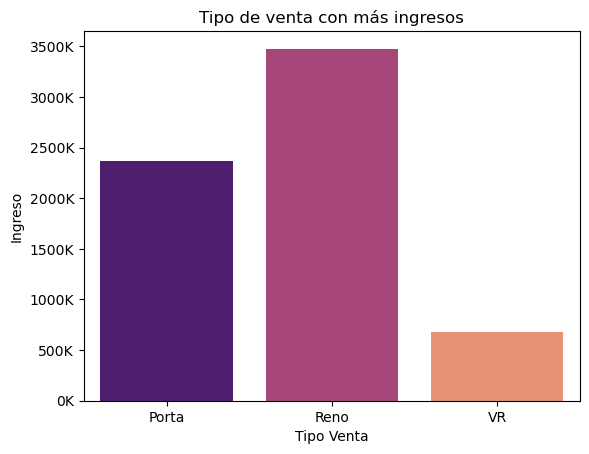

In [ ]:
tipo_venta_ing = venta.groupby('Tipo Venta')['Ingreso'].sum()/1000

ax = sns.barplot(x=tipo_venta_ing.index, y=tipo_venta_ing.values, hue=tipo_venta_ing.index, palette='magma')
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x)}K'))
plt.ylabel('Ingreso')
plt.title('Tipo de venta con más ingresos')
plt.show()

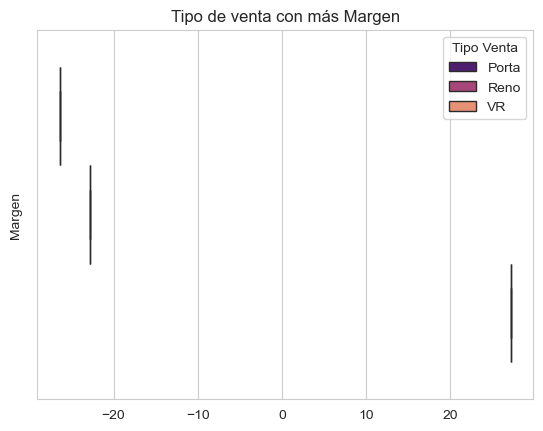

In [ ]:
tipo_venta_ing = venta.groupby('Tipo Venta')['Margen'].mean()

ax = sns.boxplot(x=tipo_venta_ing.values, hue=tipo_venta_ing.index, palette='magma')
plt.ylabel('Margen')
plt.title('Tipo de venta con más Margen')
plt.show()

Podemos observar que las ventas por Portabilidad llegan a triplicar en ingresos a las ventas por VentaRegular. Y los mayores ingresos se registran en la venta tipo Reno.

### c. Qué marca tiene mejor margen en el Clúster B?

La marca Realme tiene un margen de 48.0, siendo la marca con mejor margen del Cluster B


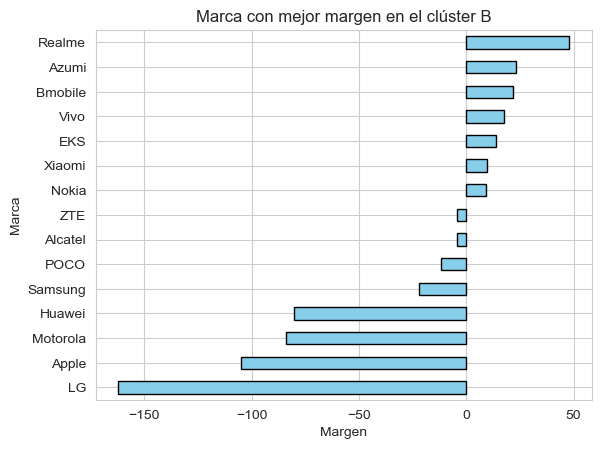

In [ ]:
# Seleccionamos solo los registros correspondientes al Cluster B
cluster_b = venta[venta['Cluster'] == 'Cluster B']

# Promediamos el Margen para cada marca del cluster B
margen_b = cluster_b.groupby('Marca')['Margen'].mean().round(1)

# Marca con mejor margen del cluster B
print(f'La marca {margen_b.idxmax()} tiene un margen de {margen_b.max()}, siendo la marca con mejor margen del Cluster B')

# Graficamos el margen por cada marca
margen_b.sort_values().plot(kind='barh', color='skyblue', edgecolor='k')
plt.xlabel('Margen')
plt.title('Marca con mejor margen en el clúster B')
plt.show()

### D. Qué canal tiene mayores costos?

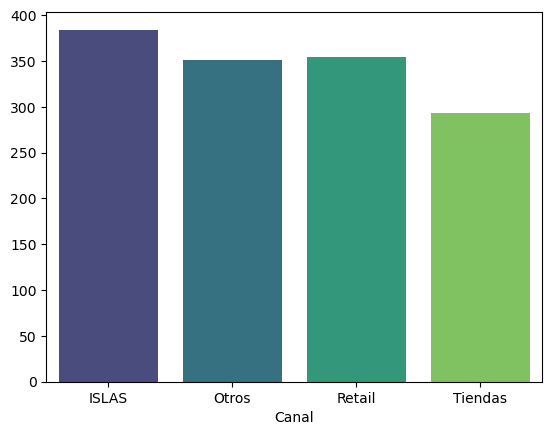

In [ ]:
# Promediamos los costos por cada canal
canal_costo = venta.groupby('Canal')['Costo'].mean().round(2)

# Graficamos
sns.barplot(x=canal_costo.index, y=canal_costo.values, hue=canal_costo.index, palette='viridis')
plt.show()

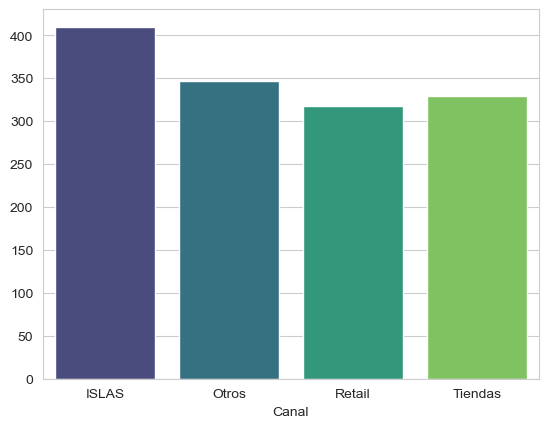

In [ ]:
# Promediamos los costos por cada canal
canal_costo = venta.groupby('Canal')['Ingreso'].mean().round(2)

# Graficamos
sns.barplot(x=canal_costo.index, y=canal_costo.values, hue=canal_costo.index, palette='viridis')
plt.show()

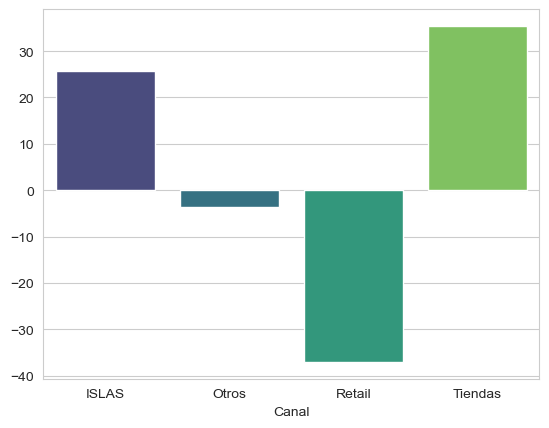

In [ ]:
# Promediamos los costos por cada canal
canal_costo = venta.groupby('Canal')['Margen'].mean().round(2)

# Graficamos
sns.barplot(x=canal_costo.index, y=canal_costo.values, hue=canal_costo.index, palette='viridis')
plt.show()

Las ventas mediante el canal ISLAS es la que tiene, ligeramente, los costos más altos respecto a los otros canales de venta.

### e. Cómo están distribuidos los ingresos?, haga un boxplot y un histograma para explicar

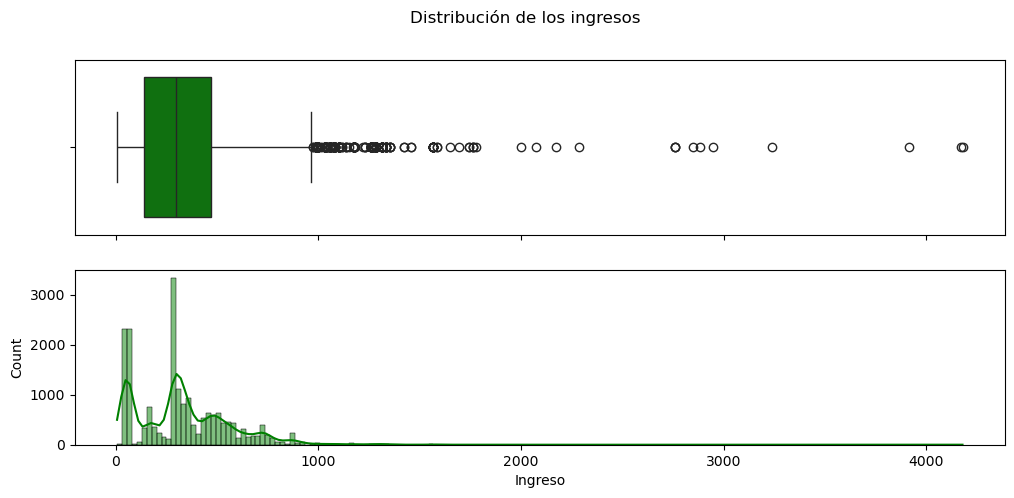

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 5), sharex=True)
sns.boxplot(data=venta, x='Ingreso', ax=axes[0], color='g')
sns.histplot(data=venta, x='Ingreso', ax=axes[1], color='g', kde=True)
plt.suptitle('Distribución de los ingresos')
plt.show()

### f. Qué día del mes tuvo más ingresos? (Use la variable Ingreso)

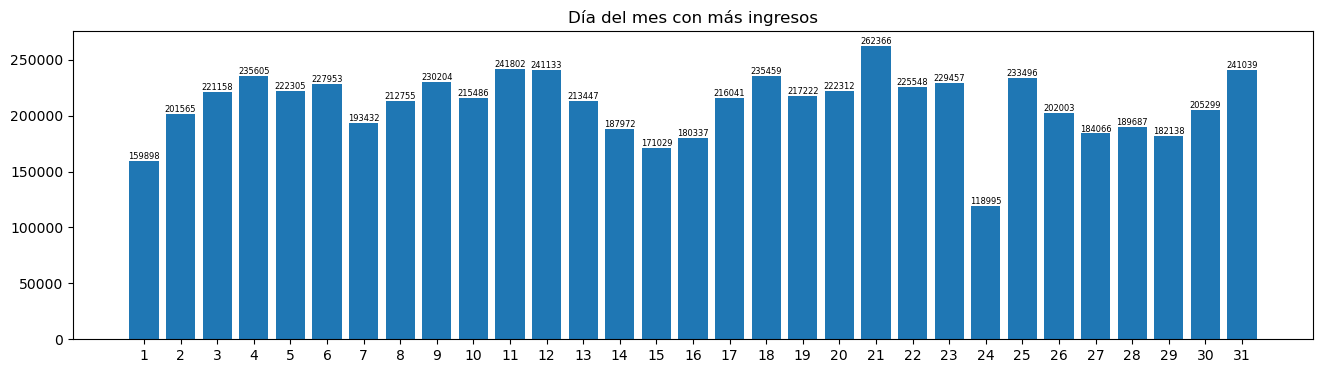

El dia 21 fue el dia con más ingresos, 262365.87


In [ ]:
dia_ing = venta.groupby('Dia')['Ingreso'].sum()

plt.figure(figsize=(16, 4))
barra = plt.bar(x=dia_ing.index, height=dia_ing.values)
plt.bar_label(barra, fontsize=6, fmt='%.0f')
plt.xticks(ticks=np.arange(1, 32))
plt.title('Día del mes con más ingresos')
plt.show()

print(f'El dia {dia_ing.idxmax()} fue el dia con más ingresos, {round(dia_ing.max(), 2)}')

### g. Realice un boxplot de la variable Costo y explíquelo a detalle indicando el Promedio, Máximo, Mínimo y Desviación estándar. Aplique la librería seaborn y separelo por gama

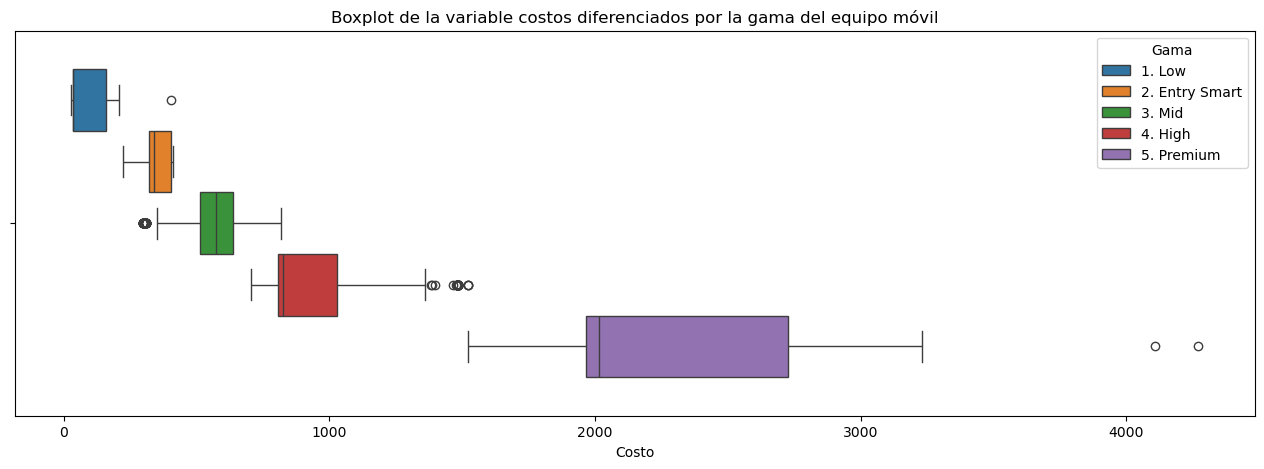

In [ ]:
plt.figure(figsize=(16, 5))
sns.boxplot(data=venta, x='Costo', hue='Gama')
plt.title('Boxplot de la variable costos diferenciados por la gama del equipo móvil')
plt.show()

### h. Haga un gráfico de correlación entre los ingresos y el Margen, utilice la librería seaborn para poder utilizar hue=Marca

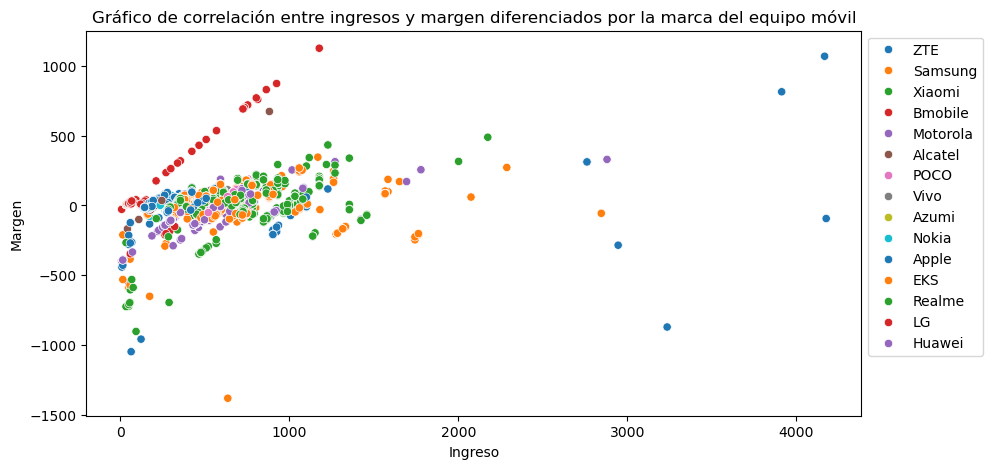

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=venta, x='Ingreso', y='Margen', hue='Marca', palette='tab10')
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Gráfico de correlación entre ingresos y margen diferenciados por la marca del equipo móvil')
plt.show()

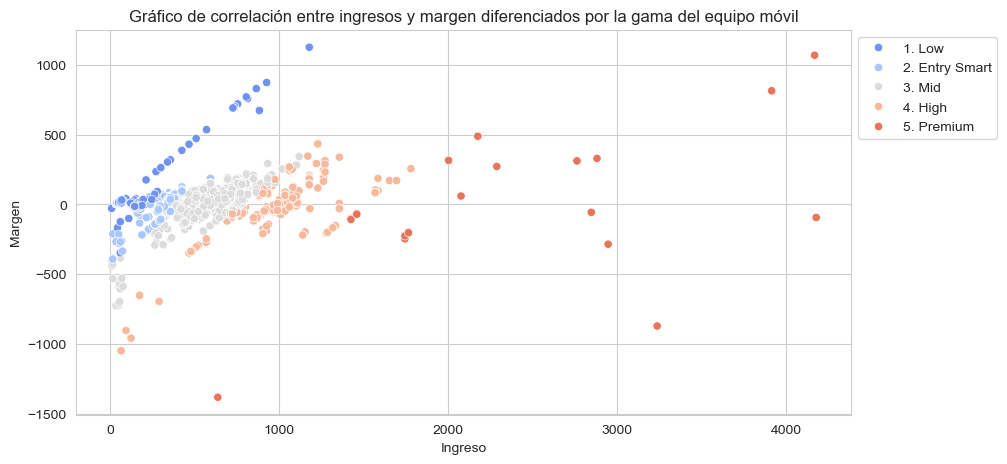

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=venta, x='Ingreso', y='Margen', hue='Gama', palette='coolwarm')
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Gráfico de correlación entre ingresos y margen diferenciados por la gama del equipo móvil')
plt.show()

## Conclusiones

- Encontramos que la gama Low es la única que tiene un margen promedio positivo, sólo la marca Alcatel tiene margen negativo en esta gama de equipos móviles. El resto de gama de los equipos presentan un margen promedio negativo.
- El tipo de venta Reno es la que genera más ingresos en la tienda, y a pesar de que la VentaReal es la que menos ingresos genera, es el único tipo de venta que genera un margen positivo.
- A pesar de que los ingresos promedios de los diferentes canales son algo similares, los canales Islas y Tiendas tienen un margen bastante alto, mientras que en los canales Otros y Retail el margen es negativo. Podemos ver que el canal Retail es el que hace que el margen global sea negativo, dado que el valor absoluto de este margen es el mayor y los ingresos promedios en este canal son altos. El canal con mayor margen positivo es Tiendas pero sus ingresos son pocos comparados con los otros canales, mientras que el otro canal con margen positivo, Islas, tiene un margen positivo algo más bajo pero es el canal por el que se obtienen mayores ingresos.